In [1]:
import numpy as np
#import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def Mac_Cormack(c,var_gamma,U,F,dx,dt, t_ini,t_fin):
	U_temp=U.copy()
	F_temp=F.copy()
	
	U_new=U.copy()
	F_new=F.copy()
	
	t=t_ini
	
	while t<t_fin:
		U_temp[:,1:-1]=U[:,1:-1]-dt*(F[:,2:]-F[:,1:-1])/dx
		F_temp=get_F(U_temp,var_gamma)
		
		U_new[:,1:-1]=(U[:,1:-1]+U_temp[:,1:-1]-dt*(F_temp[:,1:-1]-F_temp[:,0:-2])/dx)/2.0
		F_new= get_F(U_new,var_gamma)
		
		F=F_new.copy()
		U=U_new.copy()
		
		dt=get_dt(U,var_gamma,c,dx)
		
		#dt=min(dt,10*dx)
		
		if False:
			print str(t) + ' + ' + str(dt) + ':\n'
			print 'U:\n'
			print U
			print '\n F:\n'
			print F
			raw_input()
			print '---------------\n'
		
		t+=dt
	return U 


In [22]:
def get_dt(U, var_gamma,C,dx):
	rho=U[0,:].copy()
	energ=U[2,:]
	u=safe_div(U[1,:],rho)
	p=(var_gamma-1.0)*(energ-rho*(u**2)/2.0)
	A=(safe_div(np.abs(p),np.abs(rho))*var_gamma)**(0.5)
	dt=dx/(C*(max(abs(u))+max(A)))
	if False:
		print 'dt:\n' + str(dt) + '\n'
		print 'u:\n'+str(u)
		print 'rho:\n'+str(rho)
		print 'p:\n'+str(p)
		print 'e:\n'+str(energ)
		print '--------------------------\n'
		raw_input()
	return dt

def get_F(U,var_gamma):
	rho=U[0,:]
	#u=U[1,:]/rho
	u=safe_div(U[1,:],rho)
	energ=U[2,:]
	p=(var_gamma-1.0)*(energ-rho*(u**2)/2.0)
	F=np.zeros(np.shape(U))
	F[0,:]=U[1,:]
	F[1,:]=U[1,:]*u+p
	F[2,:]=u*(energ+p)
	if False:
		print 'u:\n'+str(u)
		print 'rho:\n'+str(rho)
		print 'p:\n'+str(p)
		print 'e:\n'+str(energ)
		print '--------------------------\n'
		raw_input()
	return F

In [4]:
def get_e(var_gamma, rho,u,p):
	u2=u**2
	energ=p/(var_gamma-1.0)+rho*u2/(2.0)
	return energ

def safe_div(num,denom):
	ans=num.copy()
	for i in range(len(num)):
		if denom[i]!=0.0:
			ans[i]=num[i]/denom[i]
	return ans

In [23]:
dx=0.1
tmax=10.0
c=2.0
xsteps=int(1/dx)+1
var_gamma=1.4
R=8.314
x=np.linspace(0,1,xsteps)
u=np.zeros(np.shape(x))

rho=u.copy()
rho[x<=0.5]=1.0
rho[x>0.5]=0.125

p=u.copy()
p[x<=0.5]=1.0
p[x>0.5]=0.1

energ=get_e(var_gamma,rho,u,p)

U_ini=np.zeros([3,np.shape(x)[0]])
U_ini[0,:]=rho#.copy()
U_ini[1,:]=rho*u
U_ini[2,:]=energ#.copy()

dt=get_dt(U_ini,var_gamma,c,dx)

F_ini= get_F(U_ini,var_gamma)

In [24]:
U_final=Mac_Cormack(c,var_gamma,U_ini,F_ini,dx,dt,0.0,tmax)

rho_final =U_final[0,:]
u_final = safe_div(U_final[1,:],rho_final)#U_final[1,:]/rho_final
e_final = U_final[2,:]
p_final=(var_gamma-1.0)*(e_final-rho_final*(u_final**2)/2.0)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in multiply


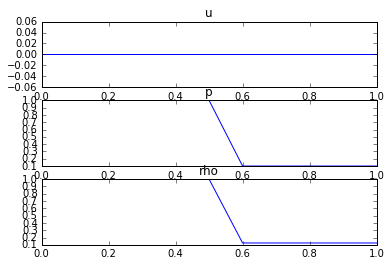

In [21]:
fig = plt.figure()

axu = fig.add_subplot(311)
axu.plot(x,u)
axu.plot(x,u_final)
axu.set_title('u')

axp = fig.add_subplot(312)
axp.plot(x,p)
axp.plot(x,p_final)
axp.set_title('p')

axr = fig.add_subplot(313)
axr.plot(x,rho)
axr.plot(x,rho_final)
axr.set_title('rho')

plt.show()

In [12]:
p

array([ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1])